In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
orders = pd.read_csv('orders.csv')
order_products__prior = pd.read_csv('order_products__prior.csv')
order_products__train=pd.read_csv('order_products__train.csv')
products=pd.read_csv('products.csv')
departments=pd.read_csv('departments.csv')
aisles=pd.read_csv('aisles.csv')

In [3]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [4]:
def downcast_dtypes(df):
    for col in df.columns:
        if df[col].dtype == 'float64':
            df[col] = df[col].astype('float32')
        elif df[col].dtype == 'int64':
            df[col] = df[col].astype('int32')
    return df

In [5]:
orders=downcast_dtypes(orders)

In [6]:
order_products__prior.head(3)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0


In [7]:
order_products__prior=downcast_dtypes(order_products__prior)

In [8]:
order_products__train.head(3)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0


In [9]:
order_products__train=downcast_dtypes(order_products__train)

In [10]:
products.head(3)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7


In [11]:
products=downcast_dtypes(products)

In [12]:
departments.head(3)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery


In [13]:
departments=downcast_dtypes(departments)

In [14]:
aisles.head(3)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars


In [15]:
aisles=downcast_dtypes(aisles)

In [16]:
orders['eval_set']=orders['eval_set'].astype('category')
departments['department']=departments['department'].astype('category')
products['product_name']=products['product_name'].astype('category')
aisles['aisle']=aisles['aisle'].astype('category')

In [16]:
order_products__prior = pd.merge(order_products__prior,products,on='product_id',how='left')
order_products__prior = pd.merge(order_products__prior,aisles,on='aisle_id',how='left')
order_products__prior = pd.merge(order_products__prior,orders,on='order_id',how='left')
order_products__prior = pd.merge(order_products__prior,departments,on='department_id',how='left')


In [17]:
order_products__prior.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,202279,prior,3,5,9,8.0,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,202279,prior,3,5,9,8.0,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,202279,prior,3,5,9,8.0,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,202279,prior,3,5,9,8.0,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,202279,prior,3,5,9,8.0,pantry


In [22]:
order_products__prior.isnull().sum()

order_id                        0
product_id                      0
add_to_cart_order               0
reordered                       0
product_name                    0
aisle_id                        0
department_id                   0
aisle                           0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
department                      0
dtype: int64

In [ ]:
order_products__prior['days_since_prior_order']=order_products__prior['days_since_prior_order'].fillna(0)

In [28]:
order_products__prior.isnull().sum()

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
aisle                     0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
department                0
dtype: int64

In [29]:
order_products__prior.dtypes

order_id                   int32
product_id                 int32
add_to_cart_order          int32
reordered                  int32
product_name              object
aisle_id                   int32
department_id              int32
aisle                     object
user_id                    int32
eval_set                  object
order_number               int32
order_dow                  int32
order_hour_of_day          int32
days_since_prior_order     int64
department                object
dtype: object

In [30]:
products_frequency_count = order_products__prior['product_name'].value_counts().head(10)

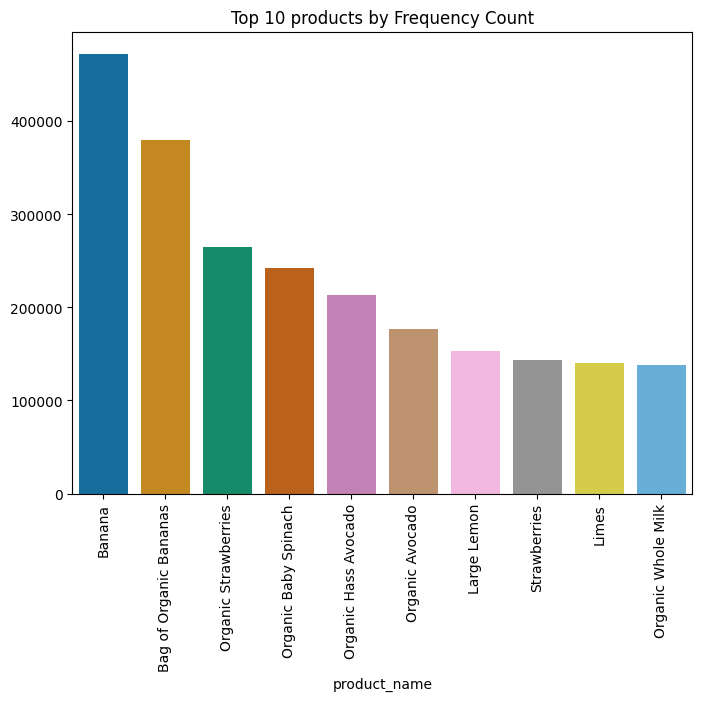

In [31]:
plt.figure(figsize=(8,6))
sns.barplot(x=products_frequency_count.index.astype(str),y=products_frequency_count.values,hue=products_frequency_count.index.astype(str),palette='colorblind')
plt.title('Top 10 products by Frequency Count')
plt.xticks(rotation=90)
plt.show()

Our data reveals a fascinating trend in customer purchases! Bananas reign supreme, accounting for a massive 400,000 purchases. Interestingly, organic options are a hit, with strawberries, spinach, avocados, and lemons appearing frequently among the top sellers. This suggests a clear customer preference for healthy choices, with bananas taking the top spot. Understanding these trends is valuable, as it allows us to optimize inventory management and promotions. Highlighting organic produce in strategic locations could be a winning strategy to capitalize on this health-conscious consumer base.


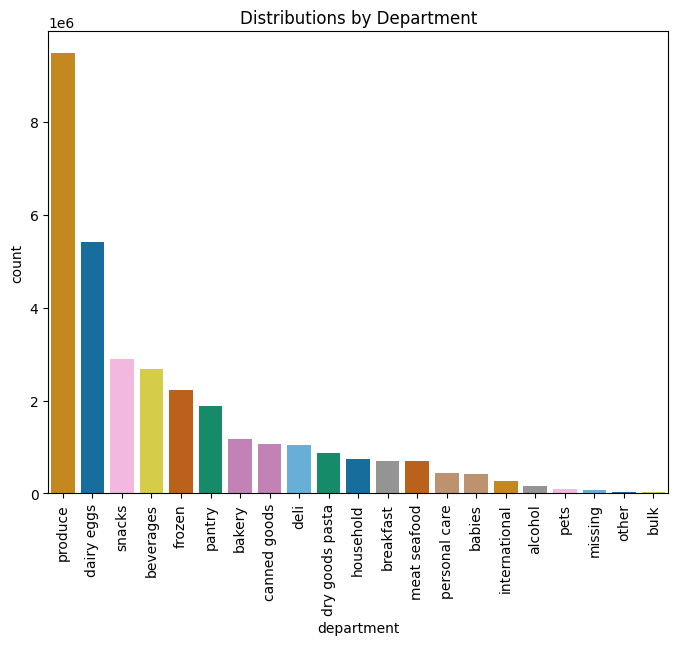

In [33]:
plt.figure(figsize=(8,6))
sns.countplot(data=order_products__prior,x='department',order=order_products__prior['department'].value_counts().index,hue='department',palette='colorblind')
plt.title('Distributions by Department')
plt.xticks(rotation=90)
plt.show()

The bar chart reveals a clear distribution of products across various departments in a store. The "Produce" department reigns supreme, boasting the highest count, followed by "Dairy Eggs". This suggests that a significant portion of customer purchases are focused on fresh food items. Interestingly, departments like "Deli" and "Bakery" have a lower count, while "Household" and "Personal Care" see an even smaller presence. This distribution provides valuable insights into customer shopping habits, potentially indicating a focus on groceries over prepared foods or household essentials.

In [34]:
top_products_reordered_rate=order_products__prior[order_products__prior['reordered']==1]['product_name'].value_counts().sort_values(ascending=False).to_frame('reordered_count').head(10)

In [46]:
top_products =top_products_reordered_rate.reset_index().head(10)
top_products

,product_name,reordered_count
0,Banana,398609
1,Bag of Organic Bananas,315913
2,Organic Strawberries,205845
3,Organic Baby Spinach,186884
4,Organic Hass Avocado,170131
5,Organic Avocado,134044
6,Organic Whole Milk,114510
7,Large Lemon,106255
8,Organic Raspberries,105409
9,Strawberries,99802


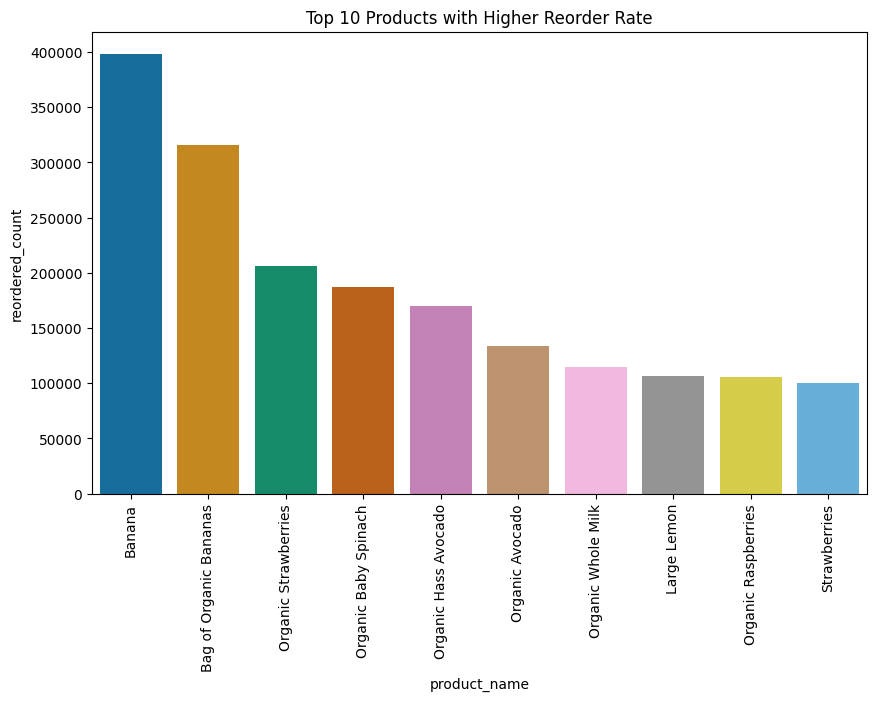

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_products['product_name'],y=top_products['reordered_count'],hue=top_products['product_name'],palette='colorblind')
plt.title('Top 10 Products with Higher Reorder Rate')
plt.xticks(rotation=90)
plt.show()

This bar chart sheds light on the top ten products that customers tend to reorder most frequently. Bananas take the top spot, with a significant lead over other products. This suggests that bananas are a popular staple item that customers consistently repurchase.  Following bananas are organic fruits and vegetables like strawberries, spinach, avocados, and lemons. This indicates a customer preference for healthy, organic produce. The inclusion of dairy products like whole milk on the list highlights the essential items customers routinely stock up on.  Understanding these reorder trends can inform inventory management strategies and promotional campaigns. Stores can prioritize stocking frequently reordered products and potentially use them as anchors to drive sales of other complementary items.

In [48]:
department_wise_reorder_ratio=order_products__prior.groupby(['department'])['reordered'].mean().to_frame('Reordered_ratio').reset_index()

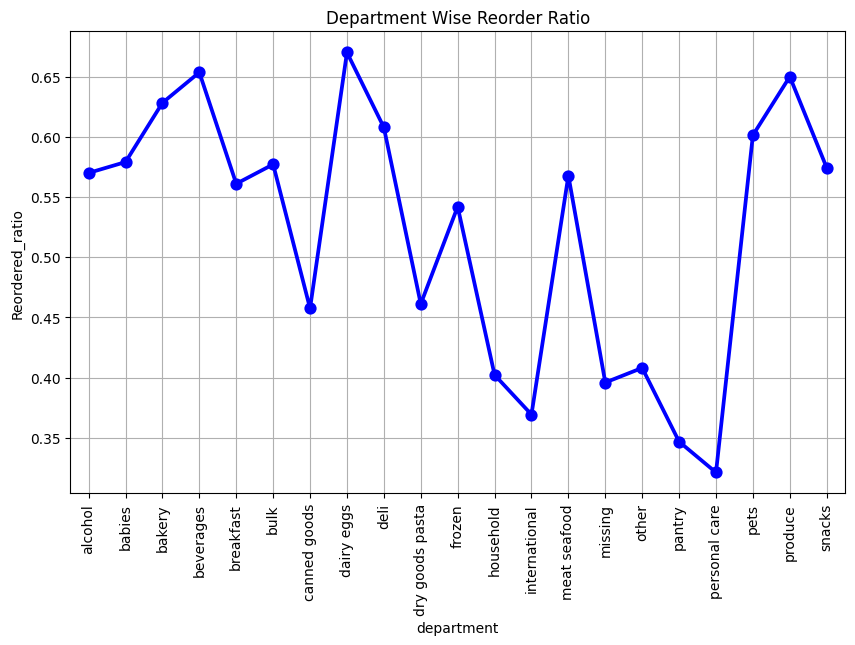

In [51]:
plt.figure(figsize=(10,6))
sns.pointplot(data=department_wise_reorder_ratio,x='department',y='Reordered_ratio',color='blue')
plt.grid()
plt.title('Department Wise Reorder Ratio')
plt.xticks(rotation=90)
plt.show()

The reorder ratio seems to be highest for the Deli department, followed closely by Meat Seafood. This suggests that these departments might require more frequent inventory replenishment, possibly because they deal with perishable items.
Departments like Pantry and Dry Goods Pasta also have a relatively high reorder ratio, indicating a frequent need for restocking these staples.
The reorder ratio is lower for departments like International and Household. This might imply that these departments contain less frequently purchased items, or items with a longer shelf life.

In [52]:
product_sold=order_products__prior['department'].value_counts()

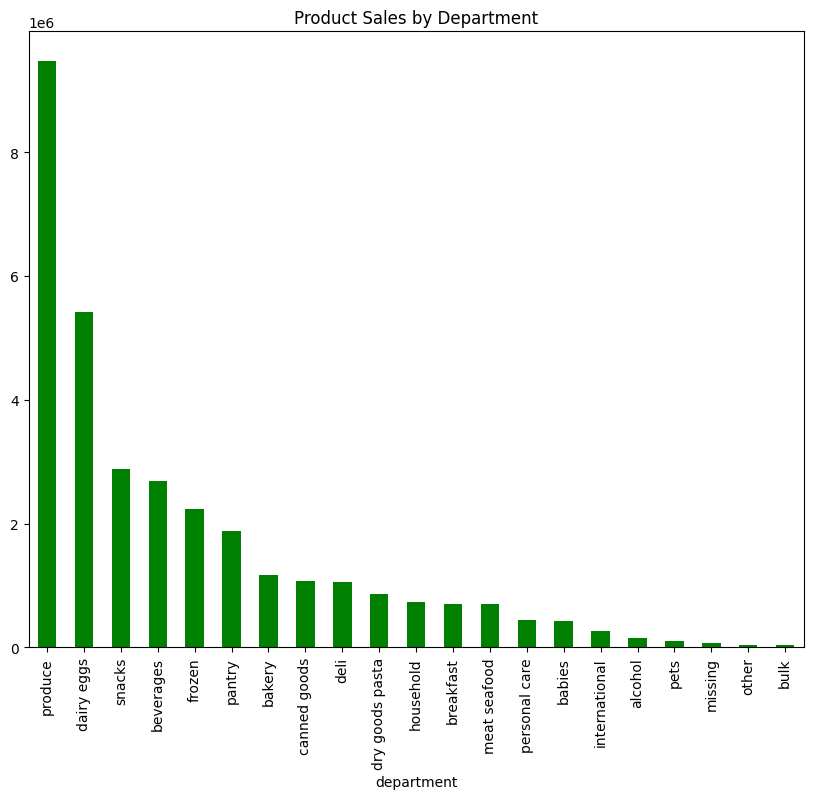

In [53]:
plt.figure(figsize=(10,8))
product_sold.plot(kind='bar',color='green')
plt.title('Product Sales by Department')
plt.xticks(rotation=90)
plt.show()

In [56]:
department_wise_reorder_ratio_witherror_bars = order_products__prior.groupby(['department'])['reordered'].mean().reset_index()
department_wise_reorder_ratio_witherror_bars['Reordered_std'] = order_products__prior.groupby(['department'])['reordered'].std().reset_index()['reordered']

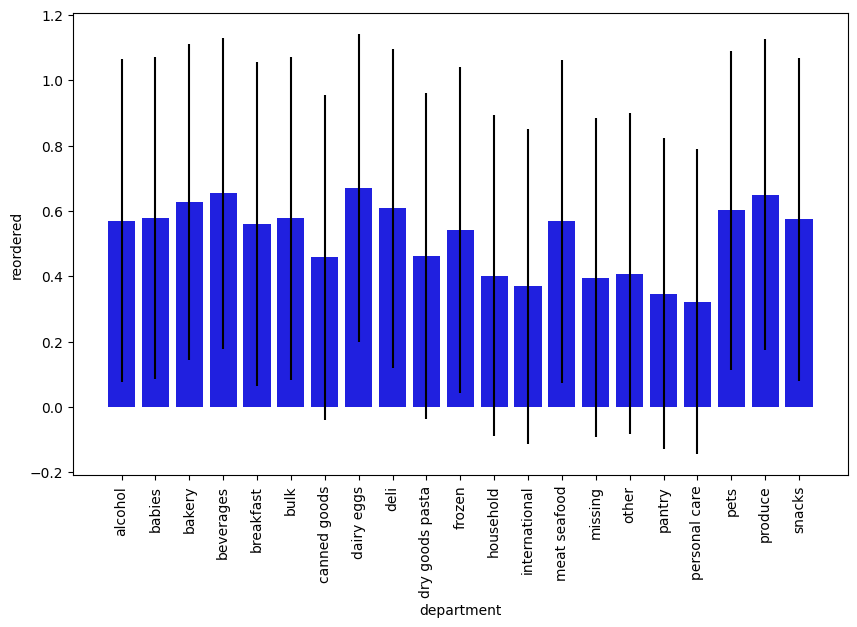

In [58]:
plt.figure(figsize=(10,6))
sns.barplot(x='department',y='reordered',data=department_wise_reorder_ratio_witherror_bars,color='blue')
plt.errorbar(x=department_wise_reorder_ratio_witherror_bars['department'],y=department_wise_reorder_ratio_witherror_bars['reordered'],yerr=department_wise_reorder_ratio_witherror_bars['Reordered_std'],fmt='None',color='black')
plt.xticks(rotation=90)
plt.show()

The department with the highest number of products sold is Produce, followed by Dairy Eggs. This suggests that customers are buying a lot of fresh food items from these departments.
Departments like Deli and Bakery have a lower number of products sold, while Household and Personal Care see even fewer sales. This might indicate that customers are buying fewer items from these departments, or that the products in these departments are typically sold in larger quantities (e.g., a package of laundry detergent might count as one sale, even though it contains multiple individual products).

In [62]:
days = {0: 'Sunday',1: 'Monday',2: 'Tuesday',3: 'Wednesday',4: 'Thursday',5: 'Friday',6: 'Saturday'}
orders_per_day = order_products__prior.groupby('order_dow')['order_id'].apply(lambda x: len(x.unique()))

weekdays = [days[day] for day in orders_per_day.index]
weekdays

['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

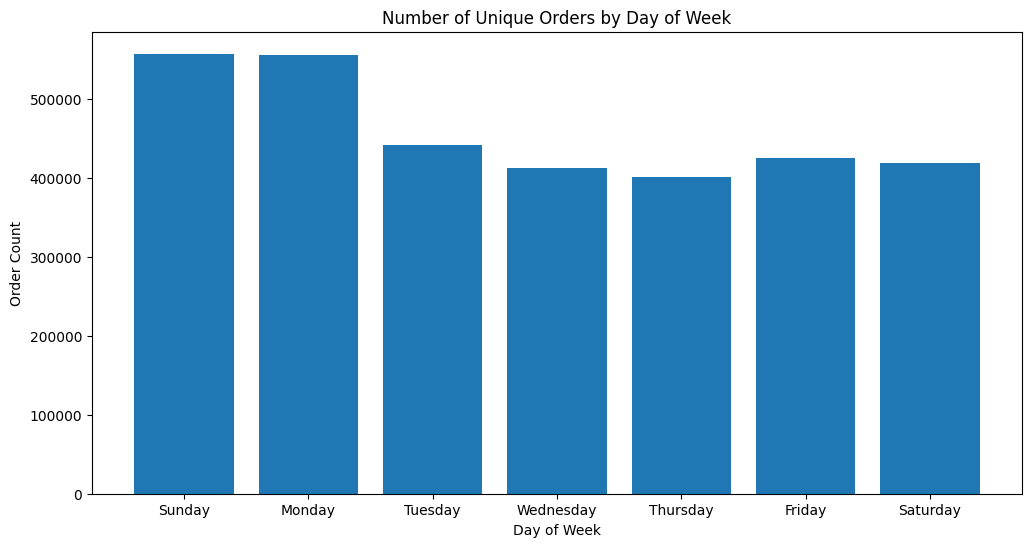

In [70]:
plt.figure(figsize=(12, 6))
plt.bar(weekdays, orders_per_day)
plt.ylabel('Order Count')
plt.xlabel('Day of Week')
plt.title('Number of Unique Orders by Day of Week')
plt.show()

Weekend Slump: The chart shows a clear trend of fewer orders being placed on weekends (Saturday and Sunday) compared to weekdays. This suggests that customer purchasing activity tends to be lower on Saturdays and Sundays.
Peak Days: Fridays appear to have the highest number of unique orders, followed by Tuesdays and Thursdays. This might indicate that customers prefer to do their shopping towards the end of the week, possibly to stock up for the weekend. Wednesdays and Mondays seem to have a lower number of orders.

In [71]:
busiest_days = order_products__prior['order_dow'].map(days).value_counts().loc[days.values()]

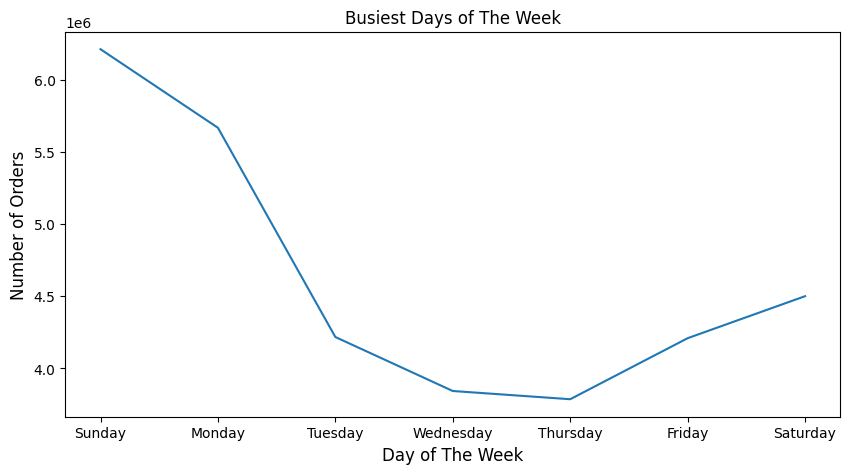

In [72]:
plt.figure(figsize=(10,5))
sns.lineplot(x=busiest_days.index, y=busiest_days.values)
plt.title('Busiest Days of The Week')
plt.ylabel('Number of Orders', fontsize=12)
plt.xlabel('Day of The Week', fontsize=12) 
plt.show()

Our data reveals a fascinating trend in customer ordering habits! Fridays and Saturdays reign supreme as the busiest days, with a clear surge in orders compared to the rest of the week. This suggests a strong preference for weekend shopping, potentially to stock up for the coming days. Throughout the weekdays, orders gradually increase, with Tuesdays and Thursdays witnessing a higher volume than Mondays and Wednesdays. This trend provides valuable insights for businesses. By strategically allocating staff and potentially running targeted promotions on weekdays, businesses can capitalize on customer behavior and optimize their operations for peak performance.

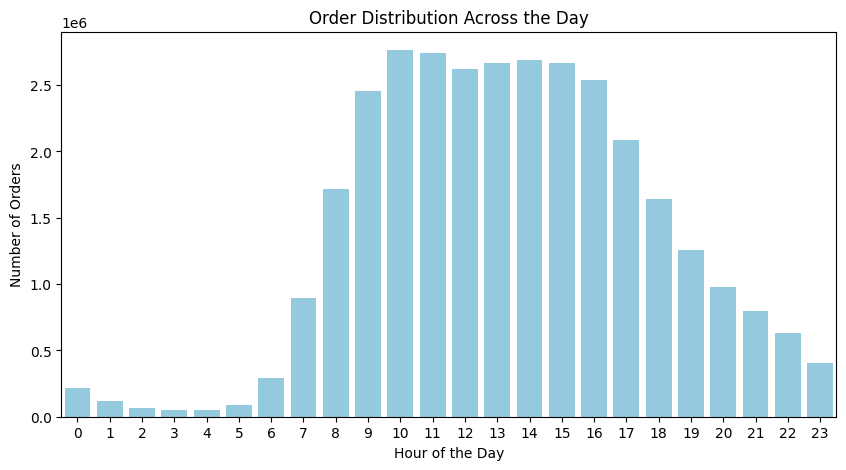

In [73]:
plt.figure(figsize=(10,5))
sns.countplot(x='order_hour_of_day', data=order_products__prior, color='skyblue')
plt.title('Order Distribution Across the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.show()

 It appears to be a histogram showing the number of orders placed throughout the day.

Night: There are very few orders placed at night (between 10 pm and 6 am). This suggests that most customers are not placing orders late at night.
Morning: The number of orders starts to increase in the morning, with a gradual rise between 6 am and noon.
Peak: The peak time for orders seems to be in the afternoon, between noon and 4 pm. This suggests that a significant portion of customers place orders during lunchtime or in the early afternoon.
Evening: The number of orders starts to decrease in the evening, between 4 pm and 10 pm.

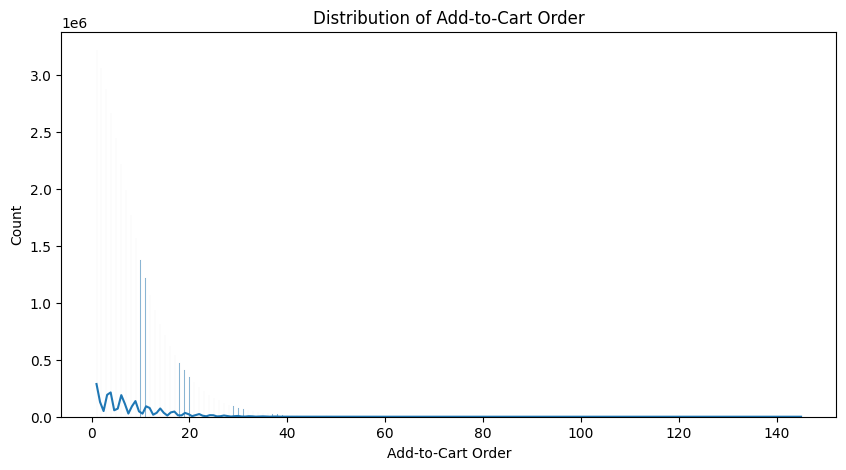

In [75]:
plt.figure(figsize=(10, 5))
sns.histplot(data=order_products__prior, x='add_to_cart_order', kde=True)
plt.title('Distribution of Add-to-Cart Order')
plt.xlabel('Add-to-Cart Order')
plt.ylabel('Count')
plt.show()

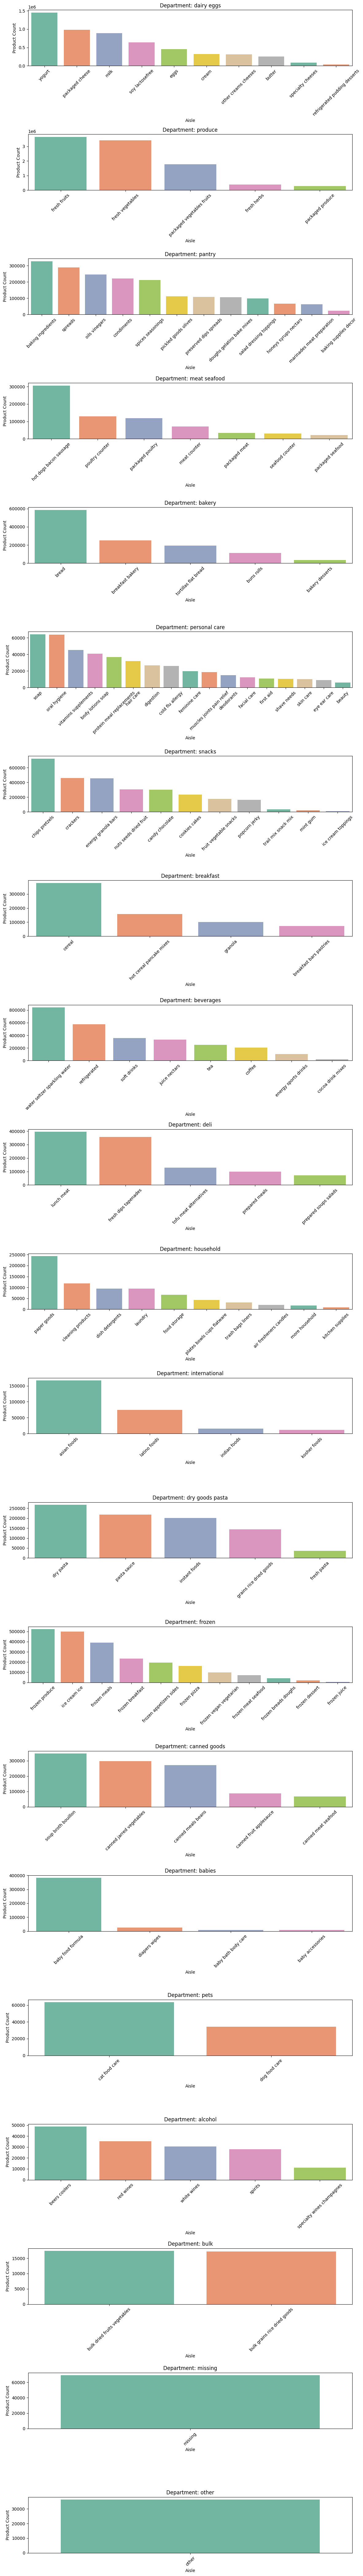

In [78]:
colors = sns.color_palette("Set2")  # Choose a different color palette

# Get the unique departments
unique_departments = order_products__prior['department'].unique()
num_rows = len(unique_departments)

# Plot departments volume, split by aisles
fig, axes = plt.subplots(num_rows, 1, figsize=(12, num_rows*4))
for i, department in enumerate(unique_departments):
    ax = axes[i]
    department_df = order_products__prior[order_products__prior['department'] == department]
    aisle_counts = department_df['aisle'].value_counts().sort_values(ascending=False)
    sns.barplot(x=aisle_counts.index, y=aisle_counts.values,hue=aisle_counts.index, ax=ax, palette=colors)
    ax.set_title(f'Department: {department}')
    ax.set_xlabel('Aisle')
    ax.set_ylabel('Product Count')
    ax.set_xticklabels(aisle_counts.index, rotation=45)
plt.tight_layout()

# Display the plots
plt.show()